<a href="https://colab.research.google.com/github/SmurferUA/Machine-Learning-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# House Price Prediction

In [ ]:
#libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from numpy import mean, std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

%matplotlib inline

In [ ]:
#load the database
data = pd.read_csv("American_dataset.csv")


In [ ]:
data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [ ]:
#check the shape of dataset
data.shape

(39981, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [ ]:
data.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39979.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47309.055715,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


In [ ]:
# Check for NaNs
nan_val = data.isnull().values.any()
nan_res = data.isnull().sum()

print("Any missing values (NaNs):", nan_val)
print("\nCount of missing values (NaNs) for each column:")
print(nan_res)

Any missing values (NaNs): True

Count of missing values (NaNs) for each column:
Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64


In [ ]:
#remove it
data.dropna(inplace=True)

In [ ]:
#check the unique values in State
data["State"].unique()

array(['New York', 'Pennsylvania', 'District of Columbia', 'Maryland',
       'Virginia', 'North Carolina', 'Georgia', 'Florida', 'Tennessee',
       'Kentucky', 'Ohio', 'Indiana', 'Michigan', 'Wisconsin',
       'Minnesota', 'Illinois', 'Missouri', 'Kansas', 'Nebraska',
       'Louisiana', 'Oklahoma', 'Texas', 'Colorado', 'Arizona',
       'New Mexico', 'Nevada', 'California', 'Oregon', 'Washington'],
      dtype=object)

In [ ]:
#Filter data
data = data[data["State"]== "California"]
data.shape

(6056, 14)

In [ ]:
# Check for duplicates
dup_value = data.duplicated().any()
dup_result = data.duplicated().sum()

print("Any duplicate values:", dup_value)
print("\nCount of duplicate rows:", dup_result)

Any duplicate values: True

Count of duplicate rows: 226


In [ ]:
#Remove duplicates
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
32212,90001,680000.0,4,2,1161,1156 E 65TH ST,Los Angeles,California,58245,6856.0,Los Angeles,70484.0,33.97365,-118.24904
32213,90001,575000.0,2,1,832,8510 S FIR AVE,Los Angeles,California,58245,6856.0,Los Angeles,70484.0,33.97365,-118.24904
32214,90001,450000.0,4,1,1260,1737 E 84TH ST,Los Angeles,California,58245,6856.0,Los Angeles,70484.0,33.97365,-118.24904
32215,90001,435000.0,2,1,720,1163 E 75TH ST,Los Angeles,California,58245,6856.0,Los Angeles,70484.0,33.97365,-118.24904
32216,90001,1695000.0,11,6,3287,903 E 79TH ST,Los Angeles,California,58245,6856.0,Los Angeles,70484.0,33.97365,-118.24904


# Data Visualization

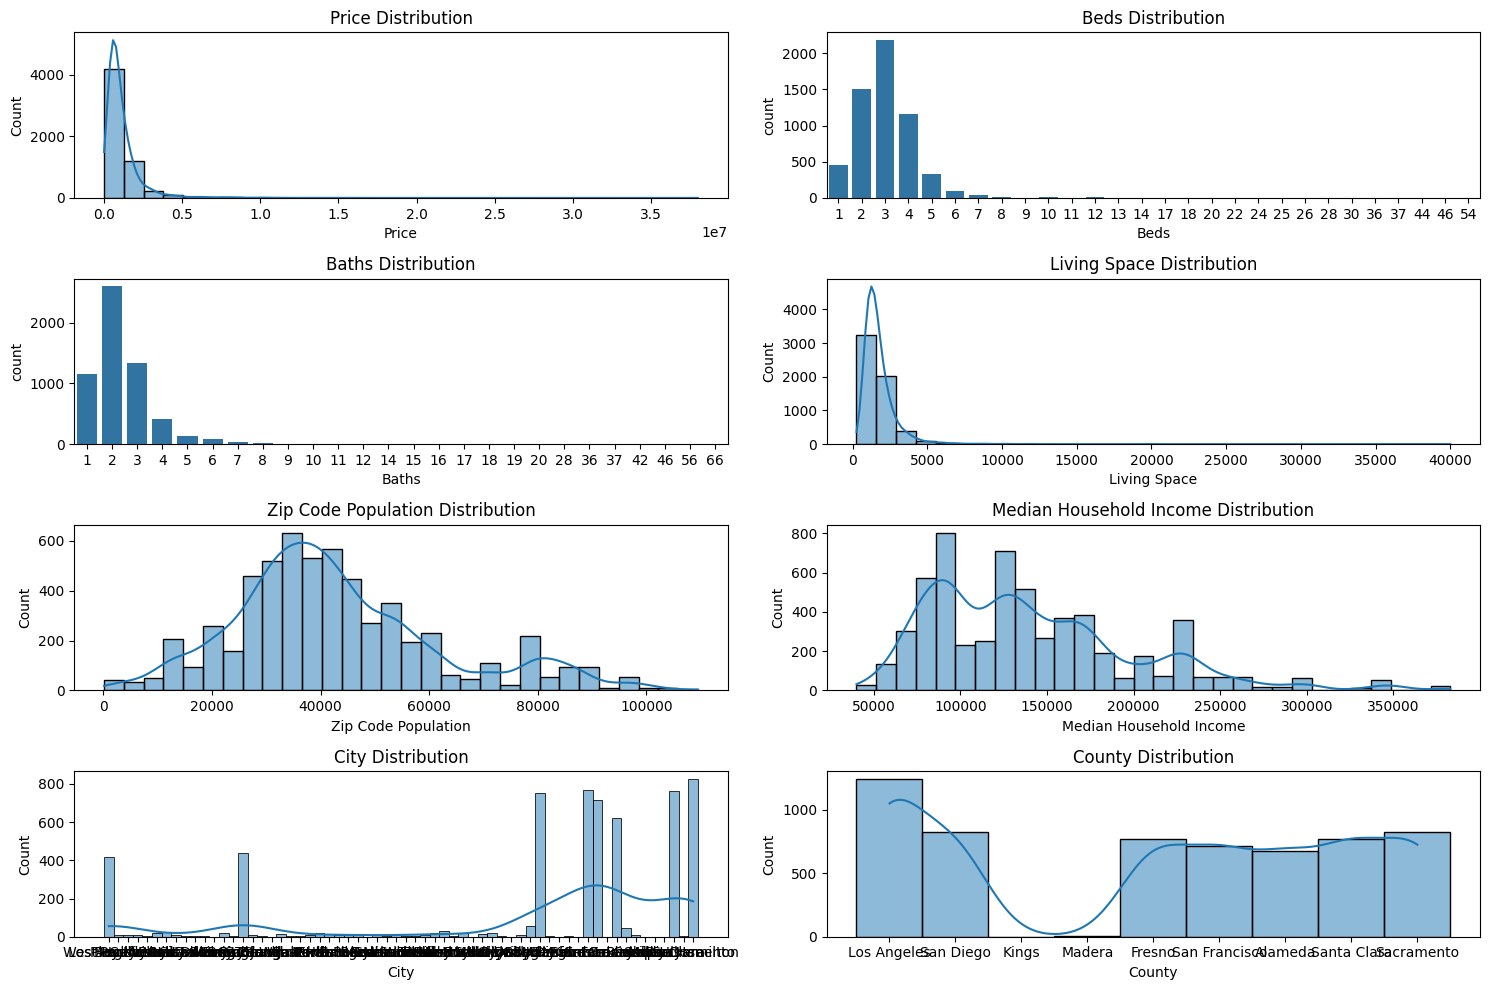

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 10))

# Price distribution
sns.histplot(data['Price'], bins=30, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Price Distribution')

# Beds distribution
sns.countplot(x='Beds', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Beds Distribution')

# Baths distribution
sns.countplot(x='Baths', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Baths Distribution')

# Living Space distribution
sns.histplot(data['Living Space'], bins=30, ax=axs[1, 1], kde=True)
axs[1, 1].set_title('Living Space Distribution')

# Zip Code Population distribution
sns.histplot(data['Zip Code Population'], bins=30, ax=axs[2, 0], kde=True)
axs[2, 0].set_title('Zip Code Population Distribution')

# Median Household Income distribution
sns.histplot(data['Median Household Income'], bins=30, ax=axs[2, 1], kde=True)
axs[2, 1].set_title('Median Household Income Distribution')
# City distribution
sns.histplot(data['City'], bins=30, ax=axs[3, 0], kde=True)
axs[3, 0].set_title('City Distribution')
# Counrty distribution

sns.histplot(data['County'], bins=30, ax=axs[3, 1], kde=True)
axs[3, 1].set_title('County Distribution')

plt.tight_layout()
plt.show()

In [ ]:
#Pie chart
#defie low, medium, high price
low_price = []
medium_price = []
high_price =[]


def visibiality_pie(data):

  for i in data["Price"]:
    if i < 1000000:
      low_price.append(i)
    elif 1000000<= i <5000000:
      medium_price.append(i)
    else:
      high_price.append(i)

visibiality_pie(data)

#Creating Pie chart
data1 = go.Pie(labels=data['County'], values=low_price, name='Low price', hole=0.5)
data2 = go.Pie(labels=data['County'], values= medium_price, name='Medium data', hole =0.5)
data3 = go.Pie(labels=data['County'], values= high_price, name='High price', hole = 0.5)
data4 = go.Pie(labels=data['County'], values= data["Price"], name='High price', hole =0.5)

# Create buttons
fig = go.Figure(data=[data1 ,data2, data3, data4])
buttons = [
    {'label': 'Low price', 'method': 'update', 'args': [{'visible': [True, False, False,False]}, {'title': 'Low price'}]},
    {'label': 'Medium data', 'method': 'update', 'args': [{'visible': [False, True, False, False]}, {'title': 'Medium data'}]},
    {'label': 'High price', 'method': 'update', 'args': [{'visible': [False, False, True, False]}, {'title': 'High price'}]},
    {'label': 'All', 'method': 'update', 'args': [{'visible': [ False, False,False, True]}, {'title': 'All'}]}
]
fig.update_layout(updatemenus=[{'buttons': buttons, 'direction': 'down', 'showactive': True}])
fig.show()

In [ ]:
#Creat seperate data base for heatmap
df_corr = data.copy()

# Drop categorical columns
df_corr.drop(columns=['Address', 'City', 'State', 'County'], inplace=True)

# Change order of columns
df_corr = data[
    ['Beds', 'Baths', 'Living Space', 'Zip Code',
     'Zip Code Population', 'Zip Code Density', 'Median Household Income',
     'Latitude', 'Longitude', 'Price']
]

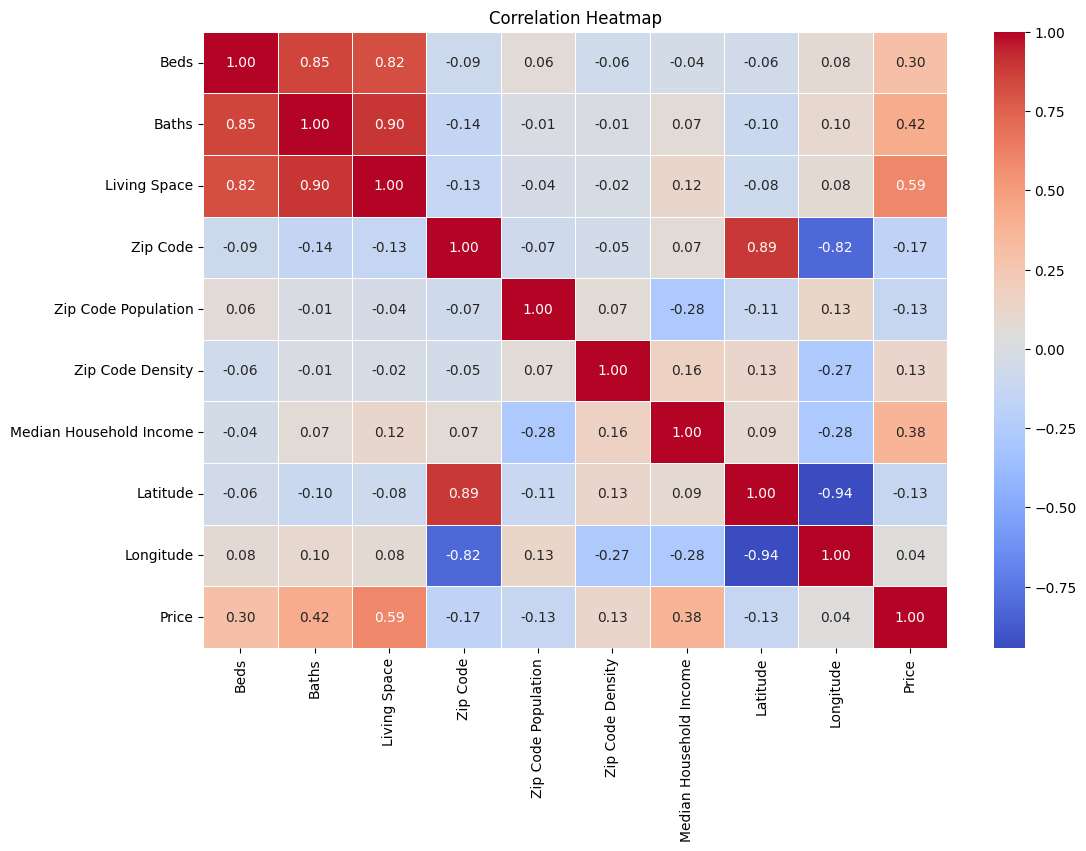

In [ ]:
# Creating correlation
correlation = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
# Choosing specific columns from the DataFrame
df = data[['Beds', 'Baths', 'Living Space',  'Zip Code Density', 'Median Household Income', 'Price']]

In [ ]:
df.head()

,Beds,Baths,Living Space,Zip Code Density,Median Household Income,Price
32212,4,2,1161,6856.0,70484.0,680000.0
32213,2,1,832,6856.0,70484.0,575000.0
32214,4,1,1260,6856.0,70484.0,450000.0
32215,2,1,720,6856.0,70484.0,435000.0
32216,11,6,3287,6856.0,70484.0,1695000.0


In [ ]:
#Check for outliers
no_outliers = df.copy()

num_cols = df.select_dtypes(include=np.number).columns.tolist()
out_per = []

for i in num_cols:
    data_mean, data_std = mean(df[i]), std(df[i])

    # Identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off

    # Identify and display outliers
    outliers = df[(df[i] < lower) | (df[i] > upper)]
    num_out = len(outliers)
    print(i, ': \n')
    print('Identified outliers:', num_out)

    # Remove outliers in the 'no_outliers' DataFrame
    no_outliers = no_outliers[(no_outliers[i] >= lower) & (no_outliers[i] <= upper)]
    num_nout = len(no_outliers)
    print('Non-outlier observations:', num_nout)

    # Calculate the percentage of outliers with 3 decimal places
    outlier_percent = '{:.3f}'.format((num_out / (num_out + num_nout)) * 100)
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Outliers = pd.DataFrame({'Feature': num_cols, '% of Outliers': out_per})

outlier_sorted = Outliers.sort_values('% of Outliers', ascending=False)
outlier_sorted

Beds : 

Identified outliers: 46
Non-outlier observations: 5784
Percent of outliers: 0.789 

Baths : 

Identified outliers: 46
Non-outlier observations: 5769
Percent of outliers: 0.791 

Living Space : 

Identified outliers: 67
Non-outlier observations: 5740
Percent of outliers: 1.154 

Zip Code Density : 

Identified outliers: 123
Non-outlier observations: 5620
Percent of outliers: 2.142 

Median Household Income : 

Identified outliers: 87
Non-outlier observations: 5540
Percent of outliers: 1.546 

Price : 

Identified outliers: 84
Non-outlier observations: 5505
Percent of outliers: 1.503 



,Feature,% of Outliers
3,Zip Code Density,2.142
4,Median Household Income,1.546
5,Price,1.503
2,Living Space,1.154
1,Baths,0.791
0,Beds,0.789


# Machine Learning

In [ ]:
df = no_outliers

In [ ]:
#Define target y and features x
X = df.drop(['Price'], axis=1)
y = df['Price']

In [ ]:
#Split the data on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Define regressor models
regressors = {
    'Linear Regression': LinearRegression(),

    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
    }

# Initialize results dictionary
results = []

# Evaluate regressors and store R2 score for each
for name, regressor in regressors.items():
    regressor.fit(X_train_scaled, y_train)
    y_pred = regressor.predict(X_test_scaled)
    Y_pred_train =regressor.predict(X_train_scaled)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)


    # Store results in dictionary
    result = {
        'Algorithm': name,
        'R2 Score': r2,
        'MSE':mse

    }

    # Append results to list
    results.append(result)

# Convert dictionary to DataFrame and sort
metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.sort_values(by='R2 Score', ascending=False)
metrics_df = metrics_df.sort_values(by= 'MSE', ascending= False )
metrics_df.set_index('Algorithm', inplace=True)

metrics_df

,R2 Score,MSE
Algorithm,,
Linear Regression,0.595363,0.201555
Gradient Boosting,0.762293,0.118405
Random Forest,0.794130,0.102546
XGBoost,0.809414,0.094933


# Grid search

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_scaled, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, best_rf.predict(X_test_scaled))
print("Mean Squared Error:", mse)
print(best_rf)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Squared Error: 0.10245501269074377
RandomForestRegressor(max_depth=10, n_estimators=200)


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import multiprocessing

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
}

# Create the GradientBoostingRegressor model
gb_regressor = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_parametrs =  grid_search.best_params_
best = GradientBoostingRegressor(** best_parametrs)
# Print the best parameters found
print(best)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


XGBoost

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9],

}
# Create the XGBRegressor model
xgb_regressor = XGBRegressor()

# Perform grid search with cross-validation using multiprocessing
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_parametrs =  grid_search.best_params_
best = XGBRegressor(** best_parametrs)
# Print the best parameters found
print(best_parametrs)

{'learning_rate': 0.1, 'n_estimators': 150, 'subsample': 0.9}


Implement grid

XGBoost

In [ ]:
xgb = XGBRegressor(learning_rate =0.1, n_estimators =150, subsample =0.9)
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8155227108549072
0.0918903073026023


Actual vs Predicted Values for XBG Regressor

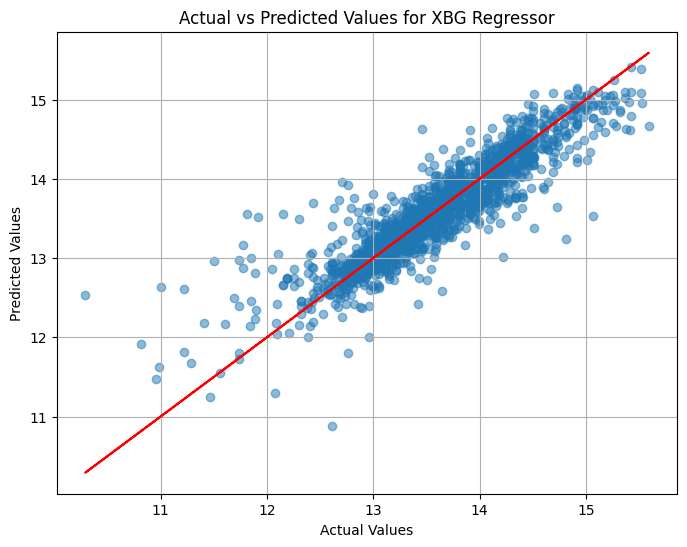

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Values for XBG Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Random Forest

In [ ]:
regr = RandomForestRegressor(max_depth=10, n_estimators=300)
regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7952125188906064
0.10200705278180641


Actual vs Predicted Values for Random Forest Regressor

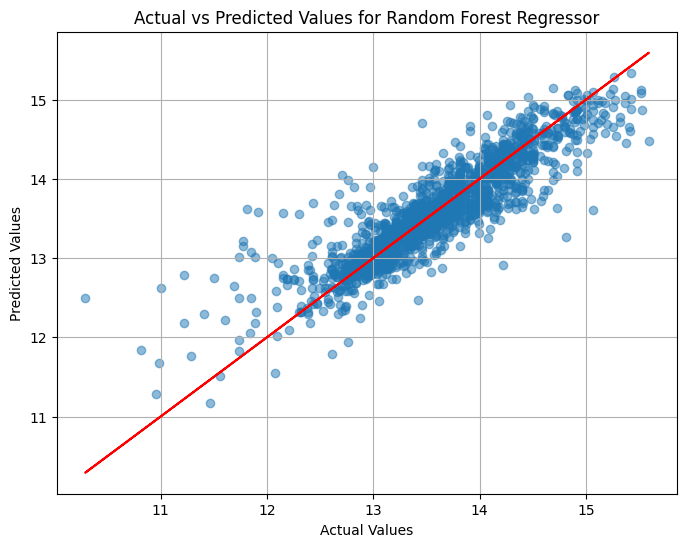

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Gradient Boosting Regressor

In [ ]:
reg = GradientBoostingRegressor( max_depth=4, n_estimators=200)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8091801080846599
0.09504963233582071


Actual vs Predicted Values for Gradient Boosting Regressor

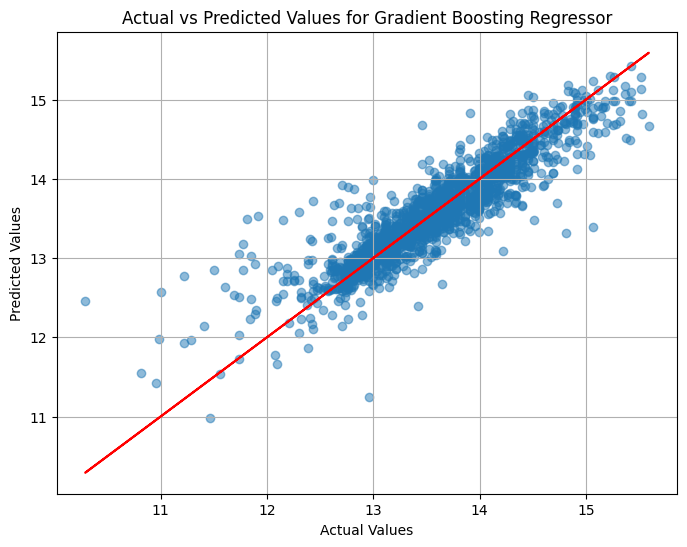

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted Values for Gradient Boosting Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
data = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
data.head(10)

,Actual,Predict
35835,14.912455,14.452169
33634,13.810498,13.657821
38168,12.834681,12.831516
37307,12.820988,12.761673
37998,13.280884,13.543573
35961,13.951701,14.065198
32472,14.394929,13.891785
32248,14.151626,14.177768
38078,12.300928,12.053740
36808,14.252474,14.032139


As XGB Regressor is the best with a R2 Score, exploring more options from it.

In [ ]:
# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df.head()

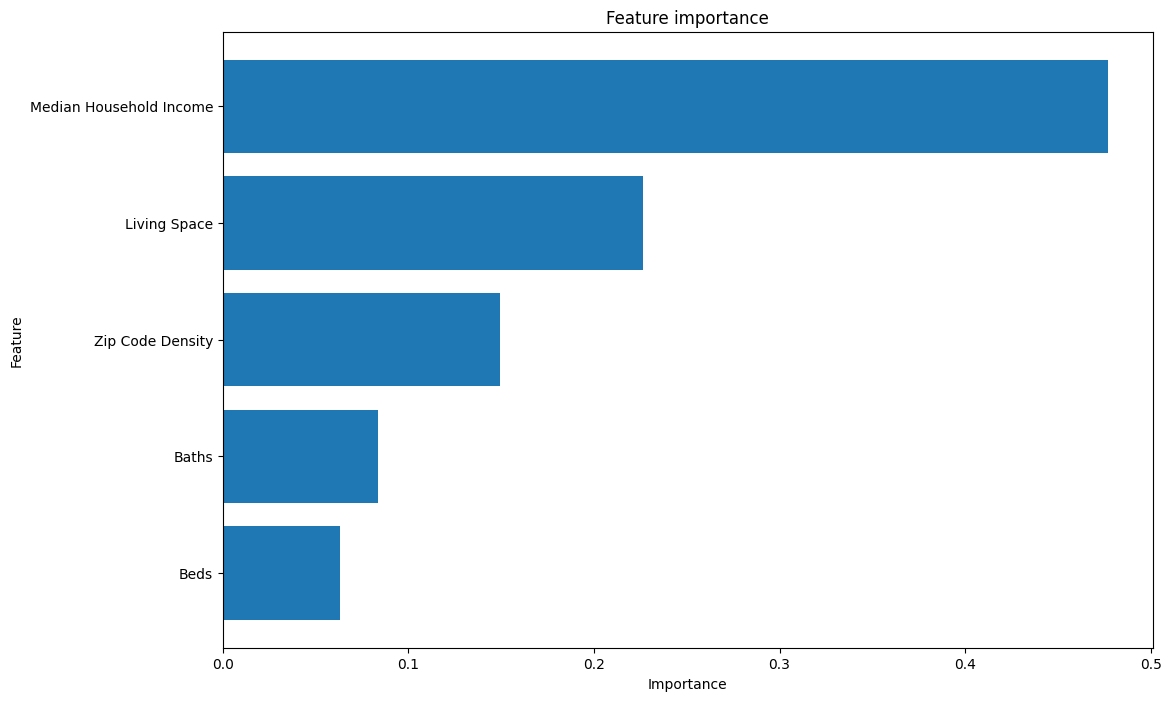

In [ ]:
# Plot  feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance')

# Invert y-axis to display most important feature on top
plt.gca().invert_yaxis()
plt.show()